Solution by Marceli P

Use the attached dataset 'heart.csv' to train the SVM classifier. For training, use the GridSearchCV method with "C" and "kernel" parameters of the selected range.
From the models trained, select the better one based on the mean accuracy of the classification (parameter 'accuracy') on the test set and display its parameters.
After selecting the best model, visualize its error matrix.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
y = df.iloc[:,-1].to_numpy()
X = df.iloc[:, :-1].to_numpy()
#print(y)
#print(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [6]:

param_grid = {'C': [0.1, 1, 10, 100, 1000,10000],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

 
grid = GridSearchCV(SVC(), param_grid, refit = True, scoring="accuracy", verbose = 3, )
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.791 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.860 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.857 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.762 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.857 total time=   0.0s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.558 total time=   0.0s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.558 total time=   0.0s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.548 total time=   0.0s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.548 total time=   0.0s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.548 total time=   0.0s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.558 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf

[CV 2/5] END ............C=10000, kernel=linear;, score=0.837 total time=   6.1s
[CV 3/5] END ............C=10000, kernel=linear;, score=0.762 total time=   9.7s
[CV 4/5] END ............C=10000, kernel=linear;, score=0.810 total time=   4.7s
[CV 5/5] END ............C=10000, kernel=linear;, score=0.833 total time=  17.4s
[CV 1/5] END ..............C=10000, kernel=poly;, score=0.744 total time=   0.0s
[CV 2/5] END ..............C=10000, kernel=poly;, score=0.767 total time=   0.2s
[CV 3/5] END ..............C=10000, kernel=poly;, score=0.810 total time=   0.0s
[CV 4/5] END ..............C=10000, kernel=poly;, score=0.786 total time=   0.1s
[CV 5/5] END ..............C=10000, kernel=poly;, score=0.810 total time=   0.0s
[CV 1/5] END ...............C=10000, kernel=rbf;, score=0.698 total time=   0.0s
[CV 2/5] END ...............C=10000, kernel=rbf;, score=0.744 total time=   0.0s
[CV 3/5] END ...............C=10000, kernel=rbf;, score=0.833 total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [7]:
print(grid.best_params_)
print(grid.best_estimator_, "\n\n")


grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
print ("Average accuracy for SVC is: ", accuracy_score(y_test, grid_predictions) * 100, "%")

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear') 


              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

Average accuracy for SVC is:  81.31868131868131 %


[[32 12]
 [ 5 42]]


C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


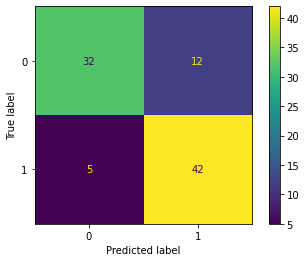

In [8]:
print(confusion_matrix(y_test, grid_predictions))
plot = plot_confusion_matrix(grid, X_test, y_test, normalize=None)
plt.show()